# Evolver Loop 1 Analysis

## Objective
Analyze the baseline EfficientNet-B0 results and identify opportunities for improvement.

Current best CV: 0.020219 (beats gold threshold of 0.038820)

## Key Observations from Baseline
- Best validation log loss: 0.020219 at epoch 4
- Overfitting occurred after epoch 4 (validation loss increased)
- Training was very fast (~50s/epoch on A100)
- Model achieved 99.94% training accuracy by epoch 14

Submission predictions summary:
count    2500.000000
mean        0.497890
std         0.495133
min         0.000001
25%         0.000165
50%         0.307196
75%         0.999958
max         1.000000
Name: label, dtype: float64

Predictions < 0.1: 1233
Predictions > 0.9: 1221
Predictions between 0.4-0.6: 4


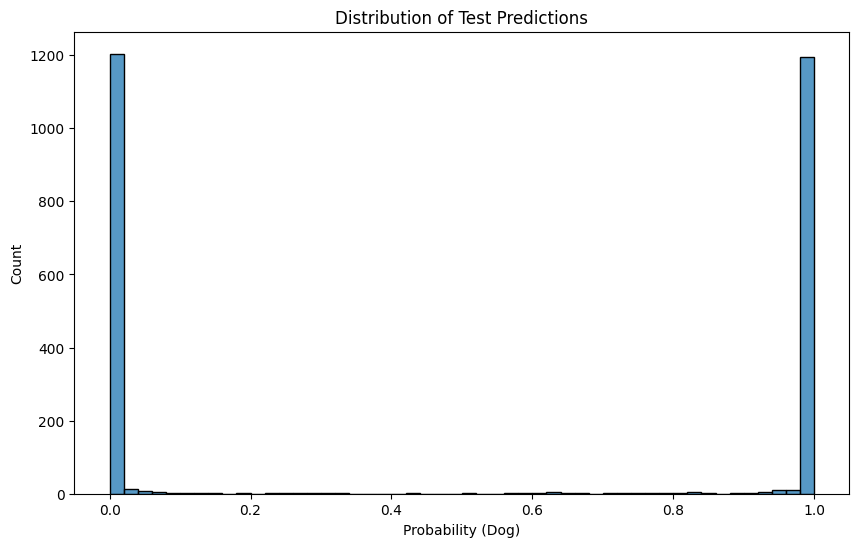

In [1]:
# Load and analyze the baseline results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the baseline submission to understand prediction distribution
submission = pd.read_csv('/home/submission/submission.csv')
print("Submission predictions summary:")
print(submission['label'].describe())
print(f"\nPredictions < 0.1: {(submission['label'] < 0.1).sum()}")
print(f"Predictions > 0.9: {(submission['label'] > 0.9).sum()}")
print(f"Predictions between 0.4-0.6: {((submission['label'] >= 0.4) & (submission['label'] <= 0.6)).sum()}")

# Visualize prediction distribution
plt.figure(figsize=(10, 6))
sns.histplot(submission['label'], bins=50)
plt.title('Distribution of Test Predictions')
plt.xlabel('Probability (Dog)')
plt.ylabel('Count')
plt.show()

## Analysis Goals

1. Understand prediction calibration
2. Identify if model is overconfident
3. Check for any data quality issues
4. Plan next improvements

In [2]:
# Check training data distribution
import os
from pathlib import Path

train_dir = Path('/home/data/train')
cat_images = list(train_dir.glob('cat*.jpg'))
dog_images = list(train_dir.glob('dog*.jpg'))

print(f"Training images:")
print(f"  Cats: {len(cat_images)}")
print(f"  Dogs: {len(dog_images)}")
print(f"  Total: {len(cat_images) + len(dog_images)}")
print(f"  Balance: {len(cat_images) / (len(cat_images) + len(dog_images)):.3f}")

# Check a few image properties
import PIL.Image as Image

sample_img = Image.open(cat_images[0])
print(f"\nSample image size: {sample_img.size}")
print(f"Sample image mode: {sample_img.mode}")

# Check distribution of image sizes
widths, heights = [], []
for img_path in cat_images[:100] + dog_images[:100]:  # Sample 200 images
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)

print(f"\nImage size statistics (sample of 200):")
print(f"  Width: min={min(widths)}, max={max(widths)}, avg={np.mean(widths):.1f}")
print(f"  Height: min={min(heights)}, max={max(heights)}, avg={np.mean(heights):.1f}")

Training images:
  Cats: 11242
  Dogs: 11258
  Total: 22500
  Balance: 0.500

Sample image size: (412, 230)
Sample image mode: RGB

Image size statistics (sample of 200):
  Width: min=90, max=500, avg=405.1
  Height: min=99, max=500, avg=357.3
